## 1. Data Exploration


In [2]:
import pandas as pd

#charge dataset
filepath = './data.csv'
amazon_prime_df = pd.read_csv(filepath)

In [4]:
print("Information")
print(amazon_prime_df.info())
print("\n")
print("Description")
print(amazon_prime_df.describe())
print("\n")
print("Head")
print(amazon_prime_df.head())
print("\n")

Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66905 entries, 0 to 66904
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               65464 non-null  object 
 1   type                66905 non-null  object 
 2   genres              65110 non-null  object 
 3   releaseYear         66741 non-null  float64
 4   imdbId              61324 non-null  object 
 5   imdbAverageRating   59206 non-null  float64
 6   imdbNumVotes        59206 non-null  float64
 7   availableCountries  66905 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.1+ MB
None


Description
        releaseYear  imdbAverageRating  imdbNumVotes
count  66741.000000       59206.000000  5.920600e+04
mean    2007.035450           5.947999  1.357821e+04
std       19.089682           1.370159  7.577765e+04
min     1902.000000           1.000000  5.000000e+00
25%     2003.000000           5.100000  1.050000e+02
5

In [5]:
##Looking for missing values
print("Missing Values")
print(amazon_prime_df.isnull().sum())

Missing Values
title                 1441
type                     0
genres                1795
releaseYear            164
imdbId                5581
imdbAverageRating     7699
imdbNumVotes          7699
availableCountries       0
dtype: int64


In [7]:
#Duplioctes
print("Duplicated Values")
print(amazon_prime_df.duplicated().sum())

Duplicated Values
277


## Data cleaning

In [9]:
# Delete null values and deleting duplicates
amazon_data_cleaned = amazon_prime_df.dropna()
amazon_data_cleaned = amazon_data_cleaned.drop_duplicates()
print("Cleaned Data")
print(amazon_data_cleaned.info())

Cleaned Data
<class 'pandas.core.frame.DataFrame'>
Index: 59160 entries, 0 to 66903
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               59160 non-null  object 
 1   type                59160 non-null  object 
 2   genres              59160 non-null  object 
 3   releaseYear         59160 non-null  float64
 4   imdbId              59160 non-null  object 
 5   imdbAverageRating   59160 non-null  float64
 6   imdbNumVotes        59160 non-null  float64
 7   availableCountries  59160 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.1+ MB
None


## Adding columns

In [16]:
amazon_data_cleaned.head()


,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.9,886.0,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8755.0,JP
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112544.0,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19286.0,US
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,"AD, AT, CU, DE, IN, JP, SN"


In [17]:
def categorized_period(year):
    if year < 2000:
        return "Classic 90s"
    elif year >= 2000 and year < 2010:
        return "Millenium Era"
    elif year >= 2010 and year < 2020:
        return "Digital Age"
    else:
        return "New decade Cinema"

In [19]:
amazon_data_cleaned['period'] = amazon_data_cleaned['releaseYear'].apply(categorized_period)

In [27]:
def categorized_rating(rating):
    if rating < 5:
        return "Bad"
    elif rating >= 5 and rating < 8:
        return "Medium"
    else:
        return "Good"

In [28]:
amazon_data_cleaned['quality'] = amazon_data_cleaned['imdbAverageRating'].apply(categorized_rating)

In [35]:
amazon_data_cleaned.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries,period,quality
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.9,886.0,"US, ZA",Classic 90s,Medium
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8755.0,JP,Classic 90s,Medium
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112544.0,"AT, DE",Classic 90s,Medium
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19286.0,US,Classic 90s,Medium
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,"AD, AT, CU, DE, IN, JP, SN",Classic 90s,Good


## Data Analysis

In [36]:
## make some data analysis here
print("Periods")
print(amazon_data_cleaned['period'].value_counts())
print("\n")
print("Quality")
print(amazon_data_cleaned['quality'].value_counts())


Periods
period
Digital Age          24974
Classic 90s          13519
New decade Cinema    12201
Millenium Era         8466
Name: count, dtype: int64


Quality
quality
Medium    42768
Bad       13288
Good       3104
Name: count, dtype: int64


In [42]:
number_of_each_period = amazon_data_cleaned.groupby('period')['title'].count()
print(number_of_each_period)
print("Percentage of each period")
print(number_of_each_period / number_of_each_period.sum() * 100)

period
Classic 90s          13519
Digital Age          24974
Millenium Era         8466
New decade Cinema    12201
Name: title, dtype: int64
Percentage of each period
period
Classic 90s          22.851589
Digital Age          42.214334
Millenium Era        14.310345
New decade Cinema    20.623732
Name: title, dtype: float64


In [43]:
# Average IMDb Rating by Period
average_rating_period = amazon_data_cleaned.groupby('period')['imdbAverageRating'].mean()
print("Average IMDb Rating by Period")
print(average_rating_period)
print("\n")

# Genre Popularity by Period
genre_counts_by_period = amazon_data_cleaned.groupby(['period', 'genres'])['title'].count().unstack().fillna(0)
print("Genre Popularity by Period")
print(genre_counts_by_period)
print("\n")

# Quality Distribution by Type
quality_by_type = amazon_data_cleaned.groupby(['type', 'quality']).size().unstack().fillna(0)
print("Quality Distribution by Type")
print(quality_by_type)
print("\n")

# Top 10 Genres Overall
top_10_genres = amazon_data_cleaned['genres'].value_counts().head(10)
print("Top 10 Genres Overall")
print(top_10_genres)
print("\n")


Average IMDb Rating by Period
period
Classic 90s          6.076381
Digital Age          5.945744
Millenium Era        5.957371
New decade Cinema    5.802467
Name: imdbAverageRating, dtype: float64


Genre Popularity by Period
genres             Action  Action, Adventure  Action, Adventure, Animation  \
period                                                                       
Classic 90s         213.0               84.0                         100.0   
Digital Age         191.0               23.0                         264.0   
Millenium Era        75.0               16.0                         103.0   
New decade Cinema   161.0               17.0                         135.0   

genres             Action, Adventure, Biography  Action, Adventure, Comedy  \
period                                                                       
Classic 90s                                 7.0                      125.0   
Digital Age                                 8.0                      21

## Graphics

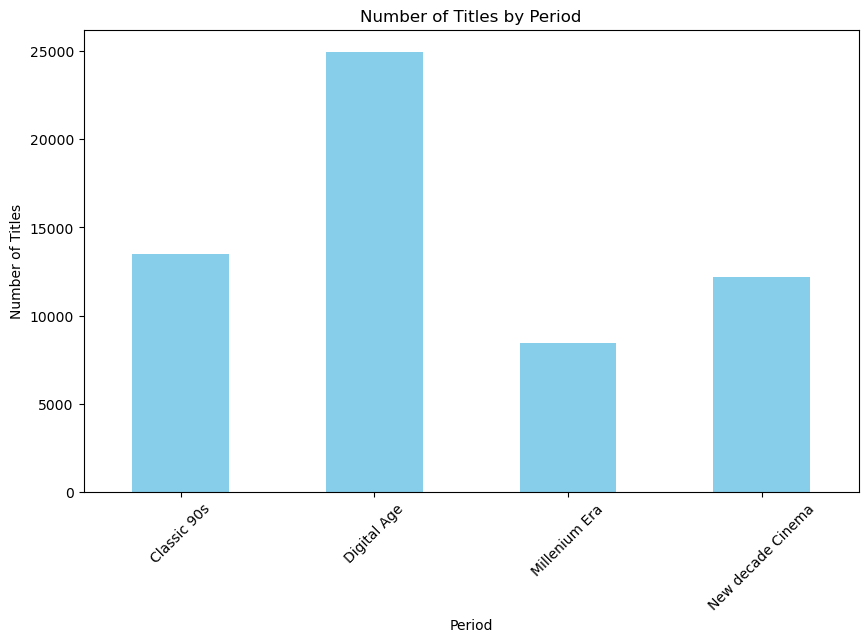

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
amazon_data_cleaned['period'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Number of Titles by Period")
plt.xlabel("Period")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


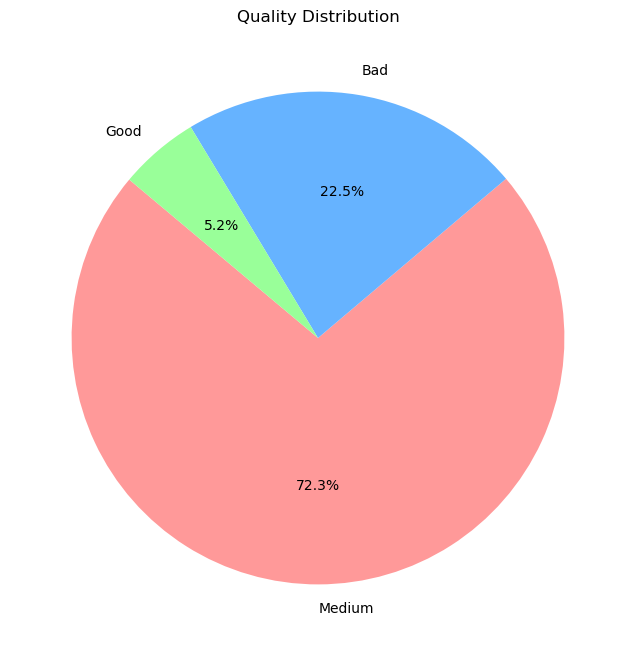

In [46]:
plt.figure(figsize=(8, 8))
amazon_data_cleaned['quality'].value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99']
)
plt.title("Quality Distribution")
plt.ylabel("")
plt.show()


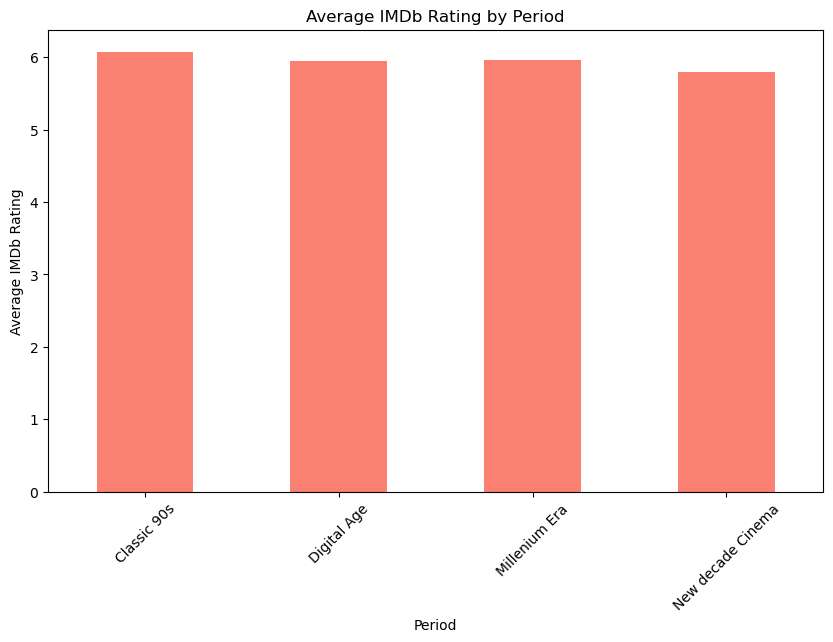

In [49]:
average_rating_period = amazon_data_cleaned.groupby('period')['imdbAverageRating'].mean()

plt.figure(figsize=(10, 6))
average_rating_period.plot(kind='bar', color='salmon')
plt.title("Average IMDb Rating by Period")
plt.xlabel("Period")
plt.ylabel("Average IMDb Rating")
plt.xticks(rotation=45)
plt.show()


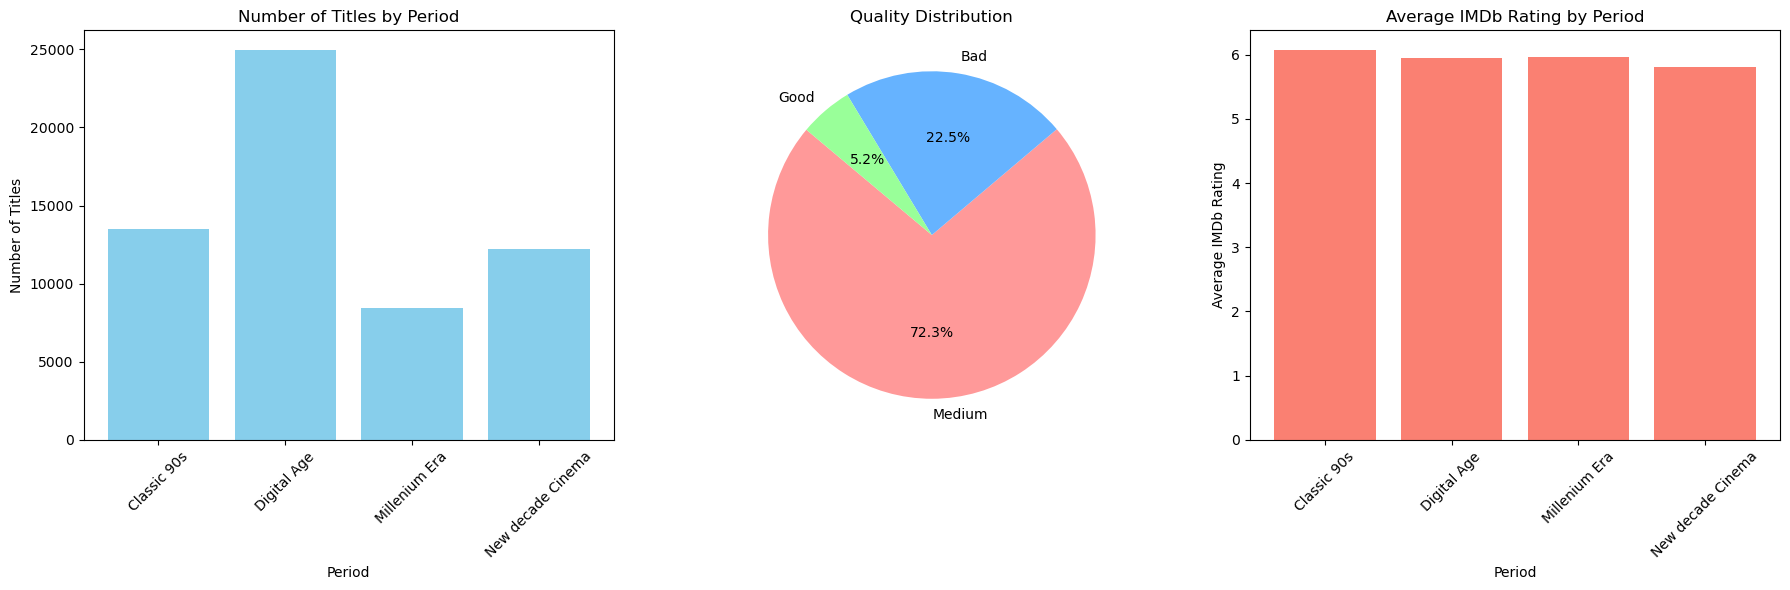

In [50]:
# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# First Plot: Bar plot of Titles by Period
axes[0].bar(amazon_data_cleaned['period'].value_counts().sort_index().index,
            amazon_data_cleaned['period'].value_counts().sort_index().values,
            color='skyblue')
axes[0].set_title("Number of Titles by Period")
axes[0].set_xlabel("Period")
axes[0].set_ylabel("Number of Titles")
axes[0].tick_params(axis='x', rotation=45)

# Second Plot: Pie chart of Quality Distribution
axes[1].pie(amazon_data_cleaned['quality'].value_counts(),
            labels=amazon_data_cleaned['quality'].value_counts().index,
            autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
axes[1].set_title("Quality Distribution")

# Third Plot: Bar plot of Average IMDb Rating by Period
average_rating_period = amazon_data_cleaned.groupby('period')['imdbAverageRating'].mean()
axes[2].bar(average_rating_period.index, average_rating_period.values, color='salmon')
axes[2].set_title("Average IMDb Rating by Period")
axes[2].set_xlabel("Period")
axes[2].set_ylabel("Average IMDb Rating")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()